In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data set
df = pd.read_csv('Salary_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
del df['Unnamed: 0']

In [5]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [6]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
df.size

60

In [8]:
df.shape

(30, 2)

In [9]:
len(df)

30

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [11]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [12]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
# visualization

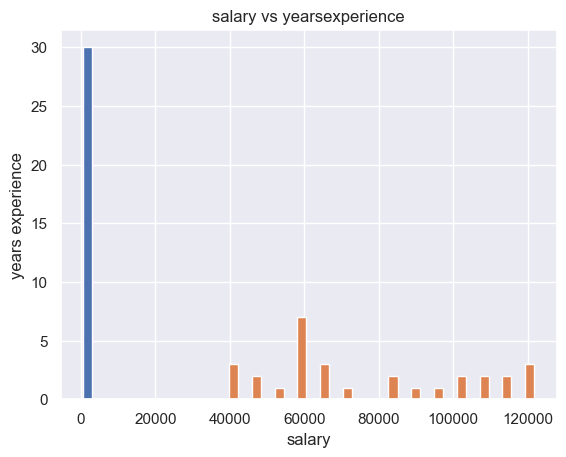

In [15]:
plt.hist(df,bins=20)
plt.title('salary vs yearsexperience')
plt.xlabel('salary')
plt.ylabel('years experience')
plt.show()

In [16]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

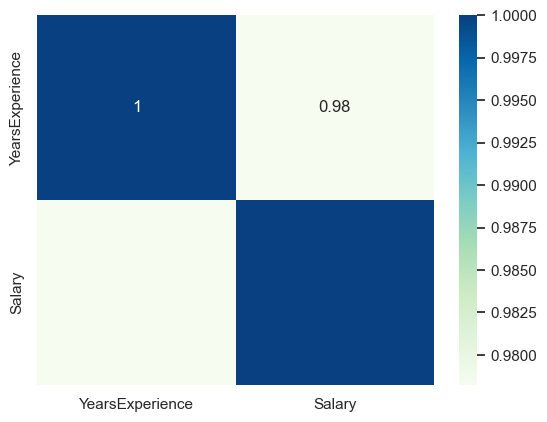

In [17]:
sns.heatmap(df.corr(),cmap='GnBu',annot=True)

In [18]:
# now,divide the feature and target varibale

In [19]:
x = df['YearsExperience'] # feature
y = df['Salary'] # Target

In [20]:
x

0      1.2
1      1.4
2      1.6
3      2.1
4      2.3
5      3.0
6      3.1
7      3.3
8      3.3
9      3.8
10     4.0
11     4.1
12     4.1
13     4.2
14     4.6
15     5.0
16     5.2
17     5.4
18     6.0
19     6.1
20     6.9
21     7.2
22     8.0
23     8.3
24     8.8
25     9.1
26     9.6
27     9.7
28    10.4
29    10.6
Name: YearsExperience, dtype: float64

In [21]:
y

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

In [22]:
# spliting the data into train and test (with split rate is 80-20)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state=5)

In [24]:
x_train

2      1.6
13     4.2
26     9.6
21     7.2
28    10.4
0      1.2
17     5.4
5      3.0
1      1.4
27     9.7
12     4.1
20     6.9
19     6.1
24     8.8
7      3.3
4      2.3
8      3.3
9      3.8
16     5.2
22     8.0
6      3.1
15     5.0
14     4.6
3      2.1
Name: YearsExperience, dtype: float64

In [25]:
y_train

2      37732.0
13     57082.0
26    116970.0
21     98274.0
28    122392.0
0      39344.0
17     83089.0
5      56643.0
1      46206.0
27    112636.0
12     56958.0
20     91739.0
19     93941.0
24    109432.0
7      54446.0
4      39892.0
8      64446.0
9      57190.0
16     66030.0
22    101303.0
6      60151.0
15     67939.0
14     61112.0
3      43526.0
Name: Salary, dtype: float64

In [26]:
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

In [27]:
lm = LinearRegression()

In [28]:
lm.fit(x_train,y_train)

LinearRegression()

In [29]:
print(lm.intercept_)

25122.372738520273


In [30]:
print(lm.coef_)

[9439.20244618]


In [31]:
# visualize the regression line

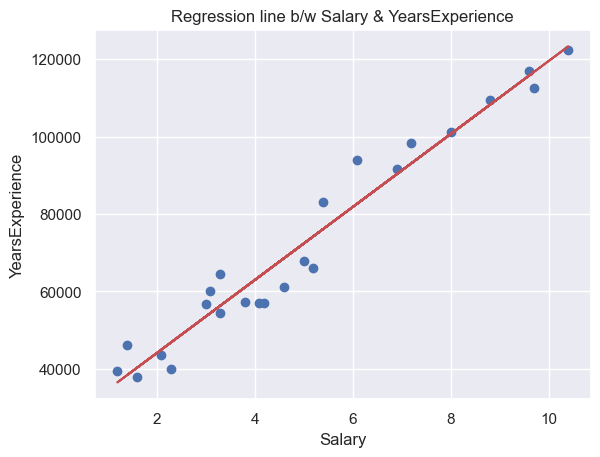

In [32]:
plt.scatter(x_train,y_train)
plt.plot(x_train,25122.37+9439.20*x_train,'r')
plt.title('Regression line b/w Salary & YearsExperience')
plt.xlabel('Salary')
plt.ylabel('YearsExperience')
plt.show()

In [33]:
# error analysis(training data)

In [34]:
y_train_pred = lm.predict(x_train)
res_train = (y_train - y_train_pred)

In [35]:
# visualize the histogram for errors

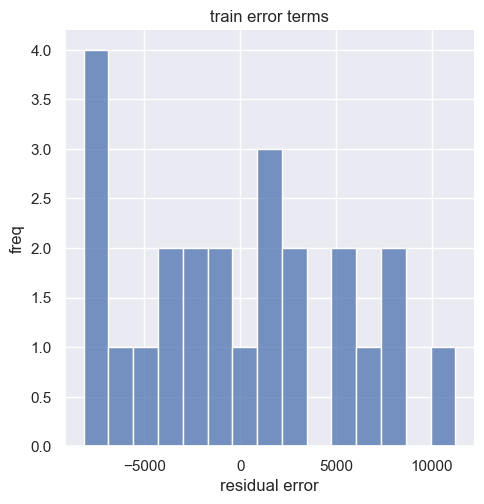

In [36]:
sns.displot(res_train,bins=15)
plt.title('train error terms')
plt.xlabel('residual error')
plt.ylabel('freq')
plt.show()

In [37]:
# error analysis for testing data

In [38]:
y_test_pred = lm.predict(x_test)
res_test = (y_test - y_test_pred)

In [39]:
# visualize the histogram for error

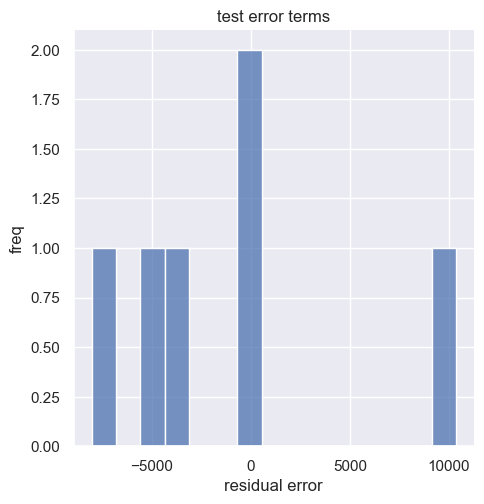

In [40]:
sns.displot(res_test,bins=15)
plt.title('test error terms')
plt.xlabel('residual error')
plt.ylabel('freq')
plt.show()

In [41]:
# now, find r2_score and mean_squared_error of the y_train and y_test

### r2_score

In [42]:
print(r2_score(y_train,y_train_pred))

0.9558669444454045


In [43]:
print(r2_score(y_test,y_test_pred))

0.9439628569611375
